<a href="https://colab.research.google.com/github/RahulJuluru2/unit2assignments/blob/main/Copy_of_U2W7_02_DT_Performance_Metrics_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Learning Objective:

At the end of the experiment, you will be able to:

*  understand the performance metrics using Decision tree classifier


In [1]:
#@title Experiment Walkthrough Video
from IPython.display import HTML

HTML("""<video width="420" height="340" controls>
  <source src="https://cdn.exec.talentsprint.com/content/performance_metrics.mp4">
</video>
""")

## Dataset

### History

Social network advertising, also social media targeting, is a group of terms that are used to describe forms of online advertising that focus on social networking services. One of the major benefits of this type of advertising is that advertisers can take advantage of the users’ demographic information and target their ads appropriately. Advantages are advertisers can reach users who are interested in their products, allows for detailed analysis and reporting, information gathered is real, not from statistical projections, does not access IP-addresses of the users.

### Description

The dataset chosen for this  experiment is Social Network Ads. The dataset contains 400 records with 5 columns representing the below details.

Data contains 5 columns:


**UserID** - Each person has a unique ID from which we can identify the person uniquely.

**Gender** - Person can be male or female.

**Age** - Age of the person. 

**EstimatedSalary** - This column contains salary of a person.

**Purchased** - Contains two numbers ‘0’ or ‘1’. ‘0’ means not purchased and ‘1’ means purchased. This variable is our target variable.

## Setup Steps

In [2]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2216842" #@param {type:"string"}

In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959488784" #@param {type:"string"}

In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "U2W7_02_DT_Performance_Metrics_A" #name of the notebook

def setup(): 
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/social_advertising.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

### Data preprocessing

#### Loading the Data

In [6]:
adv = pd.read_csv("social_advertising.csv")
adv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
adv = adv.drop(["User ID", "Gender"], axis = 1)
adv.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### Extracting the features and labels

In [8]:
X = adv.loc[:,["Age","EstimatedSalary"]] # YOUR CODE HERE: To select the Age and estimated salary as features
y = adv["Purchased"] # YOUR CODE HERE: To select Purchased column as labels

### Split the data into train and test set

In [9]:
# YOUR CODE HERE: To split the data into train and test sets with 80:20 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(320, 2) (80, 2) (320,) (80,)


### Model Classification

#### Training a Decision Tree Classifier

In [11]:
# YOUR CODE HERE: To create an instance for the decision tree classifier with criterion as 'entropy'
dt = DecisionTreeClassifier(criterion="entropy")

# YOUR CODE HERE: To fit the data to the model
dt.fit(X_train,y_train)

# YOUR CODE HERE: To get the predictions on the test data
y_pred = dt.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.8375

### Model Evaluation 

To evaluate the performance of a classification model, the following metrics are used:

* Confusion matrix
  * Accuracy
  * Precision
  * Recall
  * F1-Score


#### Confusion Matrix

* **Confusion matrix:**  is a table that is used to describe the performance of a classification model on a set of test data for which the true values are known. 

  * **true positive** The correct label of the given instance is positive, and the classifier also
predicts it as a positive
  * **false positive** The correct label is negative, but the classifier incorrectly predicts it as
positive
  * **true negative** The correct label is negative, and the classifier also predicts a negative
  * **false negative** The correct label is positive, but the classifier incorrectly predicts it as
negative

* **Accuracy:** it is the ratio of the number of correct predictions to the total number of input samples.


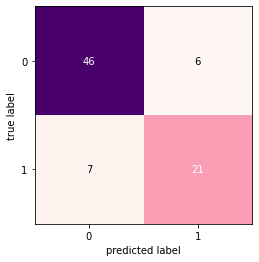

In [14]:
cm = confusion_matrix(y_pred,y_test) # YOUR CODE HERE: To create a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm.T,cmap=plt.cm.RdPu)
plt.show()

#### Classification Report : 

A Classification report is used to measure the quality of predictions from a classification algorithm. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below. 

In [20]:
# YOUR CODE HERE: To print the classification report
tp , fn , fp , tn = cm[0,0], cm[1,0] , cm[0,1], cm[1,1]
print("True Positives for classification is ",tp)
print("False Negative for classification is ",fn)
print("False Positives for classification is ",fp)
print("True Positives for classification is ",tn)

True Positives for classification is  46
False Negative for classification is  6
False Positives for classification is  7
True Positives for classification is  21


#### Precision-Recall Metrics

* **Precision:** The precision is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly)

    Precision = $\mathbf{\frac{TruePositive}{TruePositive + FalsePositive}}$

* **Recall:** Recall tells us how many true positives (points labelled as positive) were recalled or found by our model.

   Recall = $\mathbf{\frac{TruePositive}{TruePositive + FalseNegative}}$

* **F1-score:** precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.
  
   F1-score = $\mathbf{\frac{2*Precision*Recall}{Precision+Recall}}$

#### Precision

In [21]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average="macro") 

0.8228511530398324

#### Recall

In [22]:
from sklearn.metrics import recall_score
# YOUR CODE HERE: To print the recall score
recall_score(y_test,y_pred,average="macro")

0.8173076923076923

####F1-score

In [24]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)
# YOUR CODE HERE: To print the F1-score

0.7636363636363638

In [26]:
precision = 0.8
recall = 0.15
f1_score_final = (2*precision*recall)/(precision+recall)
print(f1_score_final)

precision = 0.7
recall = 0.2
f1_score_final = (2*precision*recall)/(precision+recall)
print(f1_score_final)

0.2526315789473684
0.3111111111111111


### Please answer the questions below to complete the experiment:

In [27]:
#@title A model initially has given a precision of 80% and recall of 15%. After modifying the model, the precision is 70% and recall is 20%. Will the F1-Score be higher for the modified model compared to the initial model?
Answer = "True" #@param ["","True","False"]


In [28]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [29]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything is good" #@param {type:"string"}


In [30]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [31]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [32]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [33]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [34]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1018
Date of submission:  25 Jun 2022
Time of submission:  15:44:58
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
